Top ranked strategies across tournaments
--------------------------------------------------

This notebook contains the analysis for the section "Top ranked strategies across tournaments" of the main paper.

**Imports**

In [1]:
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
import seaborn as sns
import numpy as np
import matplotlib

In [4]:
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

In [5]:
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.size"] = 11

plt.rcParams["font.family"] = "Arial"

color = matplotlib.cm.viridis(0.3)
color_c = matplotlib.cm.viridis(0.4)

In [6]:
import warnings
warnings.filterwarnings('ignore')

**Reading data sets**

In [7]:
dfs = []
for name in ['standard', 'subset_noise', 'subset_probend', 'subset_probend_noise']:
    df = pd.read_csv(f'../data/{name}_processed.csv', index_col=0)
    df['type'] = name
    dfs.append(df)

**Number of tournaments per type**

In [8]:
[dfs[i]['seed'].nunique() for i in range(4)]

[11400, 1150, 1134, 117]

### $r$ example of Tit For Tat and Gradual

In [9]:
tournament_types = ['standard', 'noisy', 'probabilistic ending', 'noisy probabilistic ending']

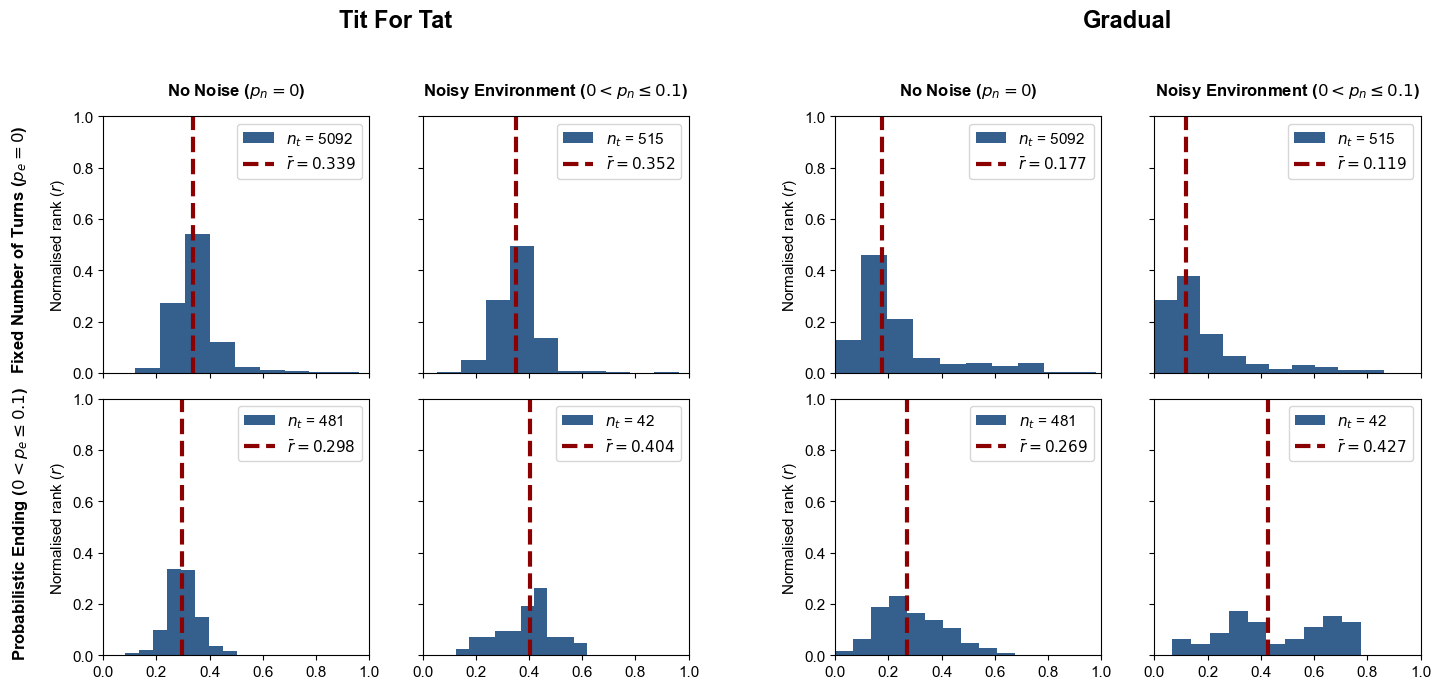

In [13]:
fig = plt.figure(figsize=(17, 7))

outer = gridspec.GridSpec(1, 2, wspace=0.25, hspace=0.45)

ax_left = fig.add_subplot(outer[0])
ax_left.axis('off')
ax_left.set_title('Tit For Tat', y=1.15, fontsize=17, fontweight='bold')

ax_right = fig.add_subplot(outer[1])
ax_right.axis('off')
ax_right.set_title('Gradual', y=1.15, fontsize=17, fontweight='bold')


# TFT

inner = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[0], wspace=0.2, hspace=0.1)

for i in range(4):
    index = (int(i / 2), i % 2)
    ax = plt.Subplot(fig, inner[index])

    values = dfs[i][dfs[i]['Name'] == 'Tit For Tat']['Normalized_Rank'].unique()
    counts = dfs[i][dfs[i]['Name'] == 'Tit For Tat']['seed'].nunique()
    weights = np.ones_like(values) / float(len(values))
    ax.hist(values, weights=weights, color=color, label=f'$n_t$ = {counts}',)
    ax.axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label=r"$\bar{r}=%s$" % round(np.median(values), 3),
    )
    ax.set_ylim(0, 1);
    ax.set_xlim(0, 1);
    ax.legend();

    if index == (0, 0):
        ax.set_ylabel("Normalised rank ($r$)")
        ax.set_xticklabels(["" for _ in range(5)]);
        ax.set_title("No Noise ($p_n = 0$)", fontsize=12, fontweight='bold', y=1.05)
        ax.text(-.35, 0.02, "Fixed Number of Turns ($p_e = 0$)", fontsize=12, rotation=90, fontweight='bold',)
        
    if index == (1, 0):
        ax.set_ylabel("Normalised rank ($r$)")
        ax.text(-.35, 0.0, "Probabilistic Ending ($0 < p_e \leq 0.1$)", fontsize=12, rotation=90, fontweight='bold',)


    if index == (0, 1):
        ax.set_title("Noisy Environment ($0 < p_n \leq 0.1$)", fontsize=12, fontweight='bold', y=1.05);
        ax.set_xticklabels(["" for _ in range(5)]);
        ax.set_yticklabels(["" for _ in range(6)]);
    if index == (1, 1):
        ax.set_yticklabels(["" for _ in range(6)]);
    fig.add_subplot(ax)
    
# GRADUAL

inner = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[1], wspace=0.2, hspace=0.1)

for i in range(4):
    index = (int(i / 2), i % 2)
    ax = plt.Subplot(fig, inner[index])

    values = dfs[i][dfs[i]['Name'] == 'Gradual']['Normalized_Rank'].unique()
    counts = dfs[i][dfs[i]['Name'] == 'Tit For Tat']['seed'].nunique()
    weights = np.ones_like(values) / float(len(values))
    ax.hist(values, weights=weights, color=color, label=f'$n_t$ = {counts}')
    ax.axvline(
        np.median(values),
        color="darkred",
        linestyle="dashed",
        linewidth=3,
        label=r"$\bar{r}=%s$" % round(np.median(values), 3),
    )
    ax.set_ylim(0, 1);
    ax.set_xlim(0, 1);
    ax.legend();
    
    if index == (0, 0):
        ax.set_ylabel("Normalised rank ($r$)")
        ax.set_xticklabels(["" for _ in range(5)]);
        ax.set_title("No Noise ($p_n = 0$)", fontsize=12, fontweight='bold', y=1.05)
        
    if index == (1, 0):
        ax.set_ylabel("Normalised rank ($r$)")

    if index == (0, 1):
        ax.set_title("Noisy Environment ($0 < p_n \leq 0.1$)", fontsize=12, fontweight='bold', y=1.05);
        ax.set_xticklabels(["" for _ in range(5)]);
        ax.set_yticklabels(["" for _ in range(6)]);
    if index == (1, 1):
        ax.set_yticklabels(["" for _ in range(6)]);
    fig.add_subplot(ax)


# plt.savefig('../images/normalised_rank_distributions.pdf', bbox_inches='tight')

### Top performers across tournament types

In [42]:
average_prfs = []
for df in dfs:
    average_prfs.append(df.groupby(['Name']).median(numeric_only=True)['Normalized_Rank'].round(decimals=3))

In [45]:
columns = []
for prfs in average_prfs:
    columns.append(prfs.sort_values()[:15].index)
    columns.append(prfs.sort_values()[:15].values)

In [46]:
table = pd.DataFrame.from_records(columns,).T

In [47]:
table.columns = ['Name', r'$\bar{r}$'] * 4

In [48]:
table.head()

,Name,$\bar{r}$,Name,$\bar{r}$,Name,$\bar{r}$,Name,$\bar{r}$
0,Evolved HMM 5,0.007,DBS,0.0,Evolved FSM 16,0.0,Raider,0.022
1,Evolved FSM 16,0.01,Evolved FSM 16 Noise 05,0.008,Evolved FSM 16 Noise 05,0.013,MEM2,0.037
2,EvolvedLookerUp2_2_2,0.011,Evolved ANN 5 Noise 05,0.013,MEM2,0.027,Prober 3,0.039
3,Evolved FSM 16 Noise 05,0.017,BackStabber,0.024,Evolved HMM 5,0.043,Evolved FSM 16 Noise 05,0.048
4,PSO Gambler 2_2_2,0.022,DoubleCrosser,0.025,EvolvedLookerUp2_2_2,0.049,Hard Prober,0.072


In [ ]:
# file = open('../paper/perfomances_table.tex', "w")
# file.write(table.to_latex())
# file.close()

### Plot $r$ distributions of top performances 

**Necessary imports and functions**

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import gaussian_kde

%matplotlib inline

In [10]:
def get_distribution_without_outliers(distribution, percentage=0.1):
    distribution.sort()
    size_of_ditribution = len(distribution)
    outliers = int(size_of_ditribution * (percentage))
    
    return distribution[:-outliers]

In [11]:
def plot_perfomance_violin_plots(df,
                                 top_names,
                                 axes,
                                 ylim_up=1,
                                 remove_outliers=False,
                                 percentage=0.1):
    data, violin_data = [], []
    for name in top_names:
        distribution = df[df['Name'] == name]['Normalized_Rank'].values
        
        data.append(distribution)
        
        if remove_outliers:
            distribution = get_distribution_without_outliers(distribution, percentage)
        violin_data.append(distribution)

    means = [np.mean(dt) for dt in data]

    parts = axes.violinplot(violin_data, showextrema=False,
                            showmeans=False);

    boxes = axes.boxplot(data, showfliers=False)
    axes.scatter(range(1, len(means) + 1), means, marker='o', color=color, zorder=3, s=50)

    for pc in parts['bodies']:
        pc.set_facecolor('lightsteelblue')
        pc.set_edgecolor('black')
        pc.set_alpha(.60)

    for bp in boxes['medians']:
        bp.set_color('purple')
        bp.set_linewidth(2)
        bp.set_linestyle('-.')
    for bp in boxes['caps']:
        bp.set_color('navy')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('navy')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('navy')
        bp.set_linewidth(2)
        
    axes.set_ylim([0, ylim_up]);
    axes.set_xticklabels(list(top_names), rotation=90);
    
    return axes

**Results**

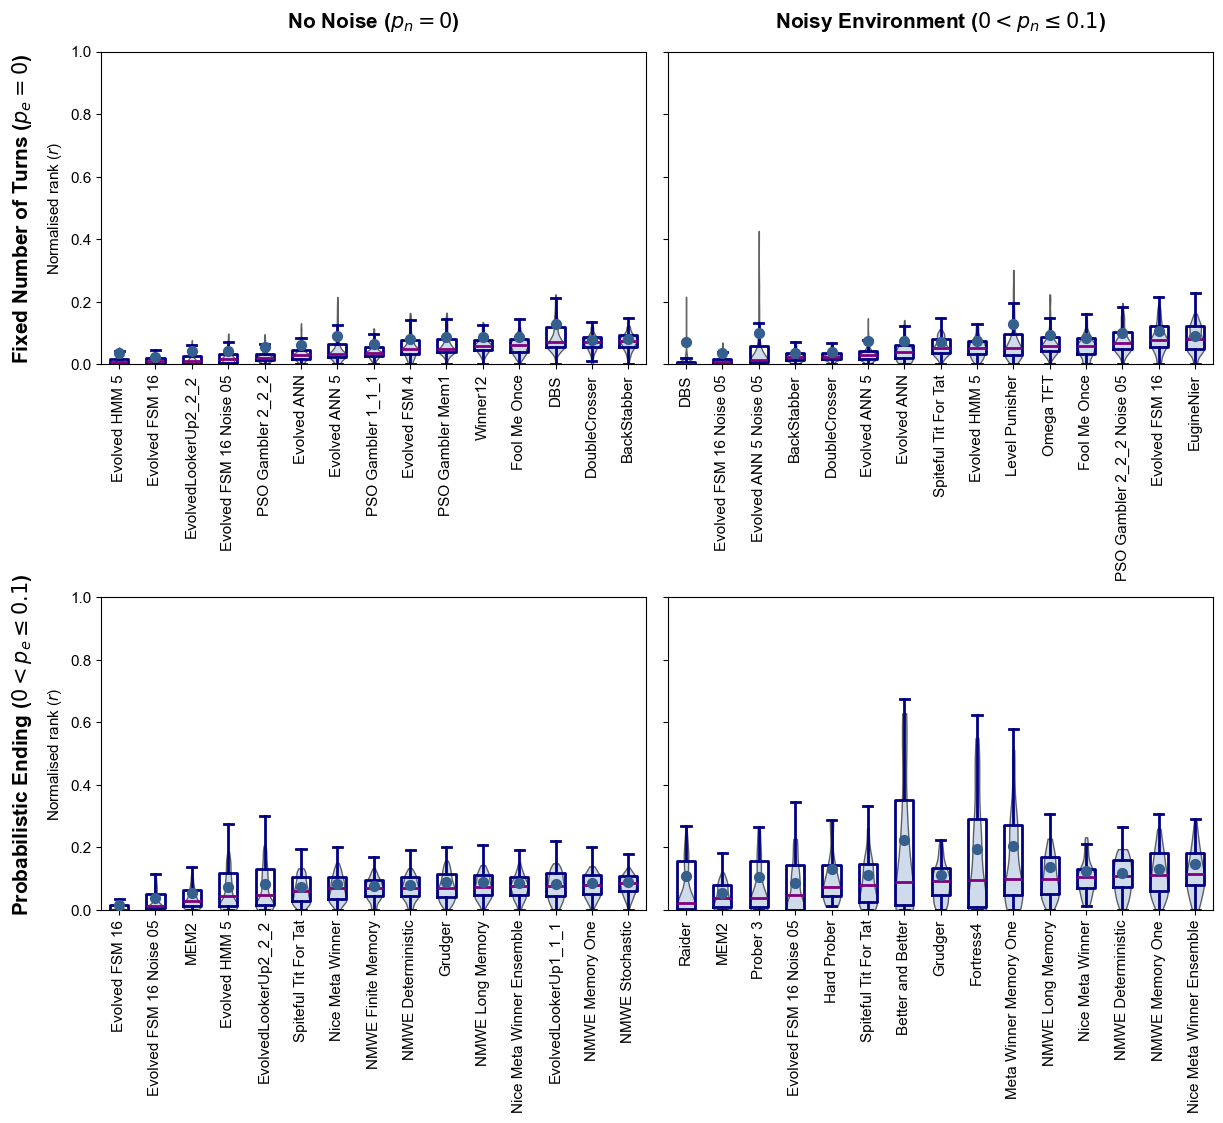

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 11))

for i, av_prf in enumerate(average_prfs):
    
    index = int(i / 2), i % 2

    top_names = list(av_prf.sort_values()[:15].index)
    
    ax = axes[index]

    ax = plot_perfomance_violin_plots(dfs[i],
                                 top_names,
                                 ax,
                                 ylim_up=1,
                                 remove_outliers=True,
                                 percentage=0.1)

    if index[1] == 0:
        ax.set_ylabel(r'Normalised rank ($r$)')
    else:
        ax.set_yticklabels(["" for _ in range(6)])
        
plt.tight_layout()

axes[0, 0].text(-2, 0.02, "Fixed Number of Turns ($p_e = 0$)", fontsize=15, rotation=90, fontweight='bold',)

axes[1, 0].text(-2, 0.0, "Probabilistic Ending ($0 < p_e \leq 0.1$)", fontsize=15, rotation=90, fontweight='bold',)

axes[0, 0].set_title("No Noise ($p_n = 0$)", fontsize=15, fontweight='bold', y=1.05)

axes[0, 1].set_title("Noisy Environment ($0 < p_n \leq 0.1$)", fontsize=15, fontweight='bold', y=1.05);

fig.savefig('../images/top_performers.pdf',
            bbox_inches='tight')